<a href="https://colab.research.google.com/github/VasanthPrakasam/Heart-Disease-Classification-Dataset/blob/main/Heart_Disease_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to a heart attack has been constructed.

Age
gender (0 for Female, 1 for Male)
heart rate (impulse)
systolic BP (pressurehight)
diastolic BP (pressurelow)
blood sugar (glucose)
CK-MB (kcm)
Test-Troponin (troponin)
output field pertains to the presence of heart attack (class)

In [57]:
# Load the dataset
df = pd.read_csv('/content/Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


there are 8 features & one target class
all features numerical

In [58]:
# get description about database
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [59]:
# Basic information
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")

Dataset shape: (1319, 9)
Features: ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', 'class']


In [60]:
# Target distribution
heart_attack_counts = df['class'].value_counts()
print(f"Heart Attack Distribution:")
print(f"Negative (No): {heart_attack_counts[0]}")
print(f"Positive (Yes): {heart_attack_counts[1]}")


Heart Attack Distribution:
Negative (No): 810
Positive (Yes): 509


/tmp/ipython-input-1255518788.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Negative (No): {heart_attack_counts[0]}")
/tmp/ipython-input-1255518788.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Positive (Yes): {heart_attack_counts[1]}")


# 🤖 Model Training Example

In [61]:
# Prepare features and target
X = df.drop('class', axis=1)
y = df['class']


In [62]:
# checking for missing values in features
for col in X.columns:
    print(f"{col}: {X[col].isnull().sum()}")
    print(f"{col}: {X[col].isna().sum()}")
    print("-" *20)

age: 0
age: 0
--------------------
gender: 0
gender: 0
--------------------
impluse: 0
impluse: 0
--------------------
pressurehight: 0
pressurehight: 0
--------------------
pressurelow: 0
pressurelow: 0
--------------------
glucose: 0
glucose: 0
--------------------
kcm: 0
kcm: 0
--------------------
troponin: 0
troponin: 0
--------------------


In [63]:
for col in X.columns:
    Q1 = X[col].quantile(.25) # This calculates the first quartile (25th percentile) for the current column.
    Q3 = X[col].quantile(.75) # This calculates the third quartile (75th percentile) for the current column.
    IQR = Q3 - Q1 # This calculates the Interquartile Range (IQR), which is the range between the first and third quartiles.
    lower_bound = Q1 - (1.5 * IQR) # This calculates the lower bound for identifying outliers. Any value below this bound is considered an outlier.
    upper_bound = Q3 + (1.5 * IQR) # This calculates the upper bound for identifying outliers. Any value above this bound is considered an outlier.

    outliers = X[(X[col]  < lower_bound) | (X[col] > upper_bound)]
    #  This line filters the DataFrame X to select only the rows where the value in the current column is either less than the lower bound or greater than the upper bound.
    # These selected rows represent the outliers for that column.
    print(f"Feature: {col}") # This prints the name of the current feature being examined.
    print(f"Number of Outliers: {outliers.shape[0]}") #  This prints the number of rows in the outliers DataFrame for the current column, which is the count of outliers in that feature
    print("=" * 20)

Feature: age
Number of Outliers: 7
Feature: gender
Number of Outliers: 0
Feature: impluse
Number of Outliers: 30
Feature: pressurehight
Number of Outliers: 32
Feature: pressurelow
Number of Outliers: 12
Feature: glucose
Number of Outliers: 92
Feature: kcm
Number of Outliers: 205
Feature: troponin
Number of Outliers: 257


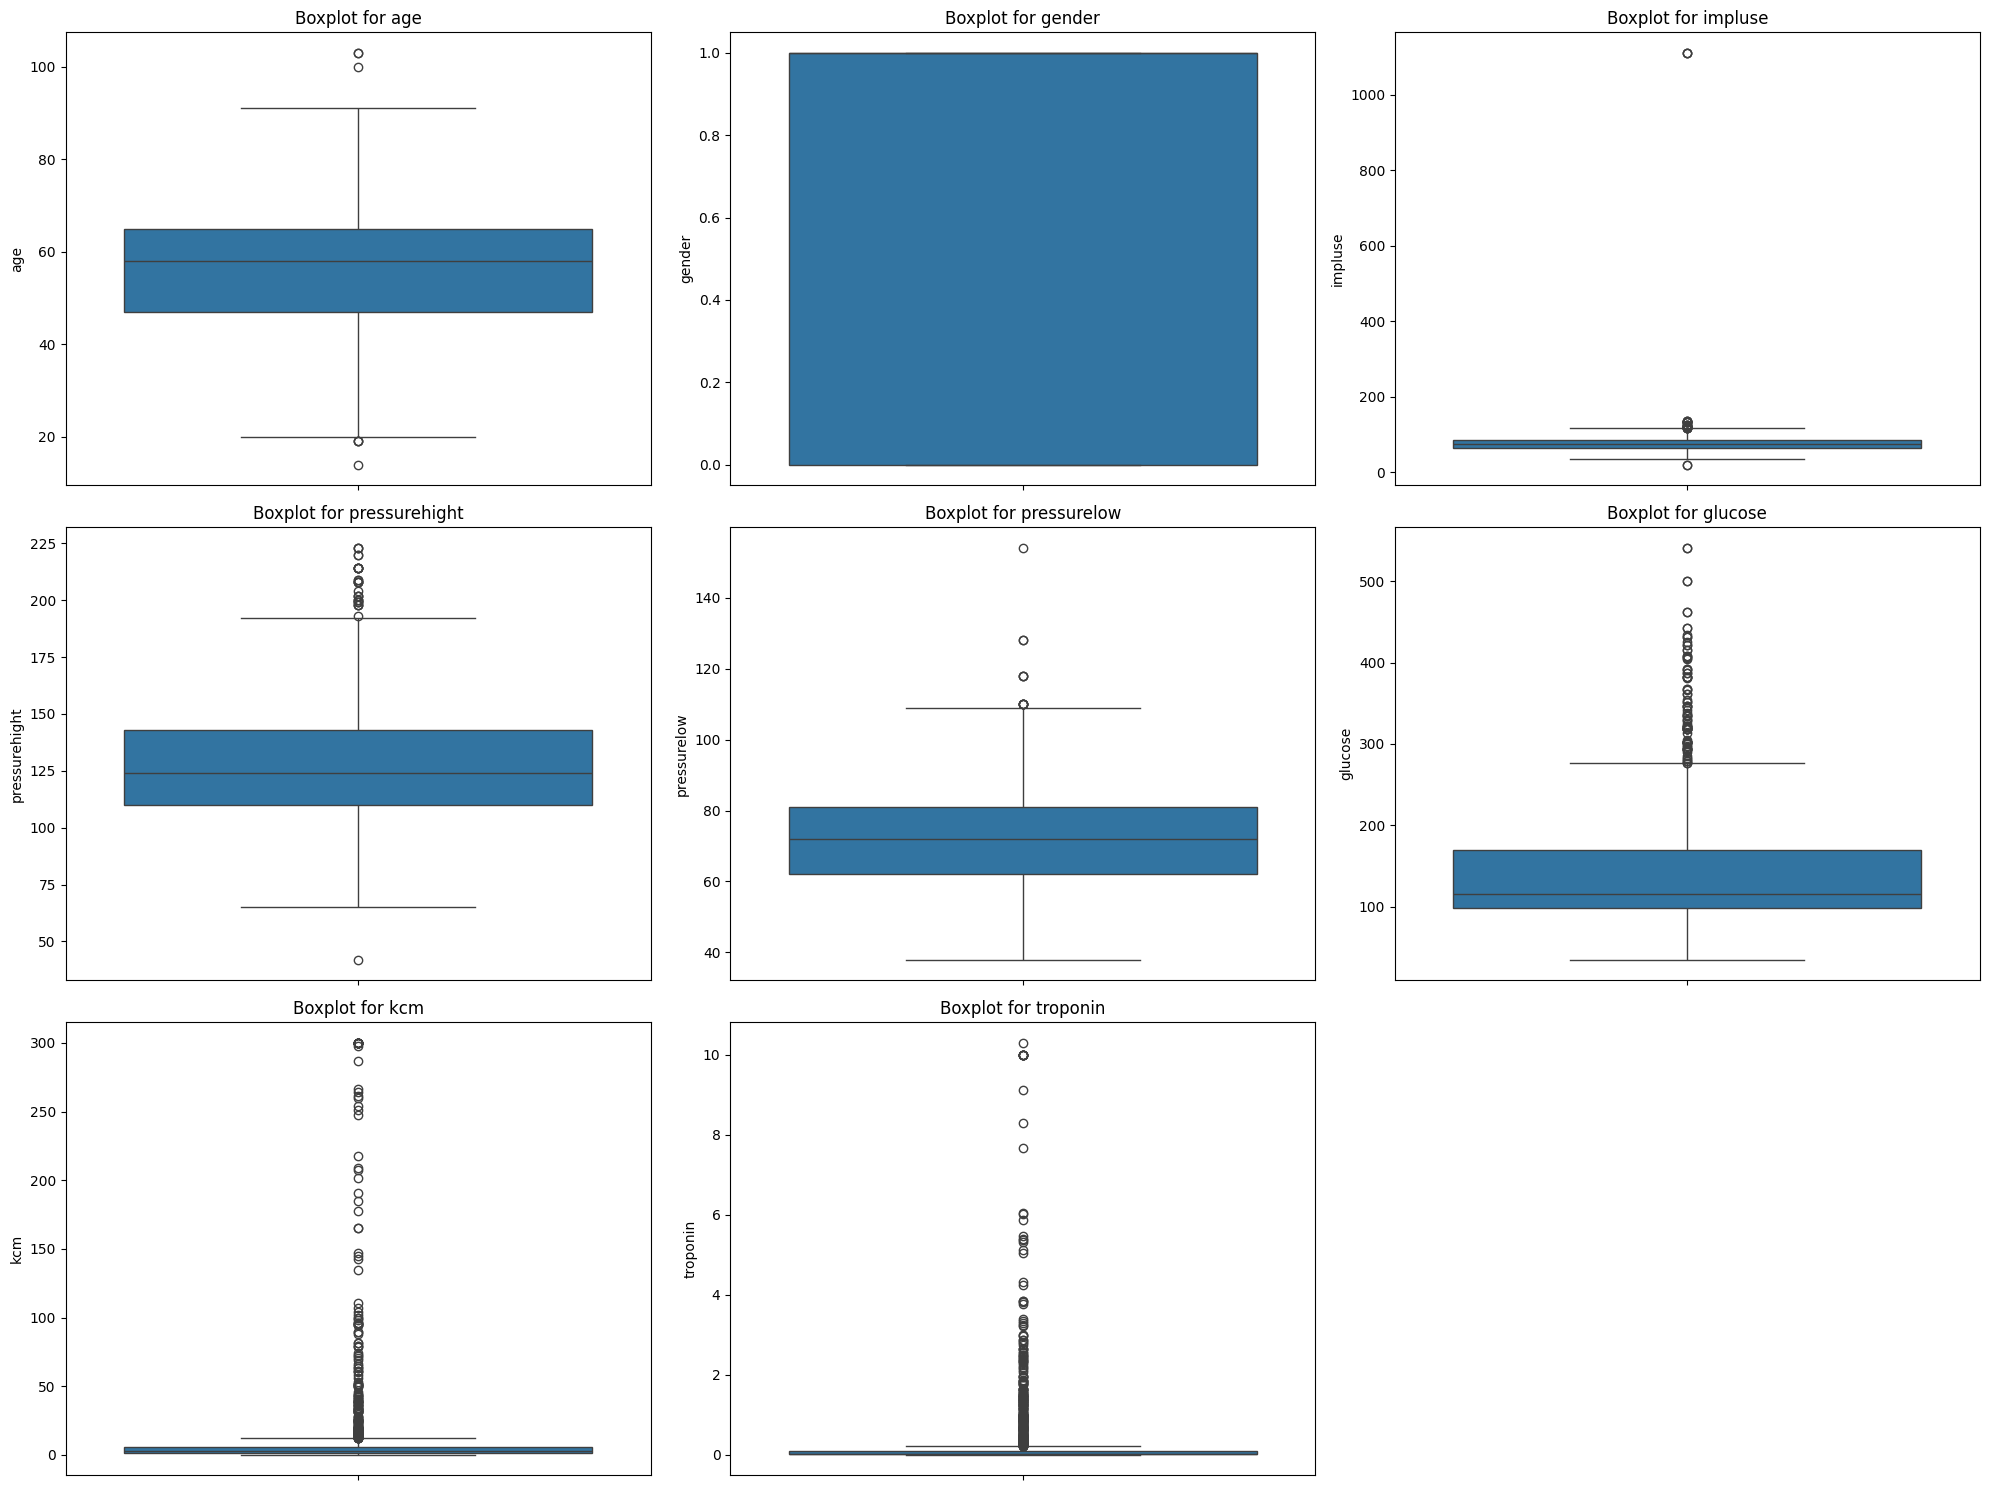

In [64]:
# visualizations outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15)) # This line creates a new figure for the plots and sets its size to 20 inches wide by 15 inches tall. This helps ensure the individual plots are large enough to be readable.
for i, col in enumerate(X.columns): # This loop iterates through each column name in your features DataFrame X, keeping track of both the index (i) and the column name (col).
    plt.subplot(3, 3, i+1) # This line creates a grid of subplots within the figure. 3, 3 specifies a 3x3 grid (9 plots in total). i+1 specifies the current position of the subplot in the grid (starting from 1).
    sns.boxplot(X[col]) # This is the core plotting command. It uses seaborn to create a box plot for the data in the current column X[col].
    plt.title(f'Boxplot for {col}') # This sets the title for the current subplot to indicate which feature it represents.
    plt.tight_layout() # This function automatically adjusts the subplot parameters to give a tight layout, preventing labels and titles from overlapping.
plt.show()

In [65]:
X.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

In [66]:
features_contain_outliers = ['age','impluse', 'pressurehight','pressurelow','glucose','kcm','troponin']

In [67]:
# treat outliers using imputing Outliers
def replace_outliers(date_frame):
    df_clean = date_frame.copy()
    for col in features_contain_outliers:
        Q1 = df_clean[col].quantile(.25)
        Q3 = df_clean[col].quantile(.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clean

In [68]:
X = replace_outliers(X)

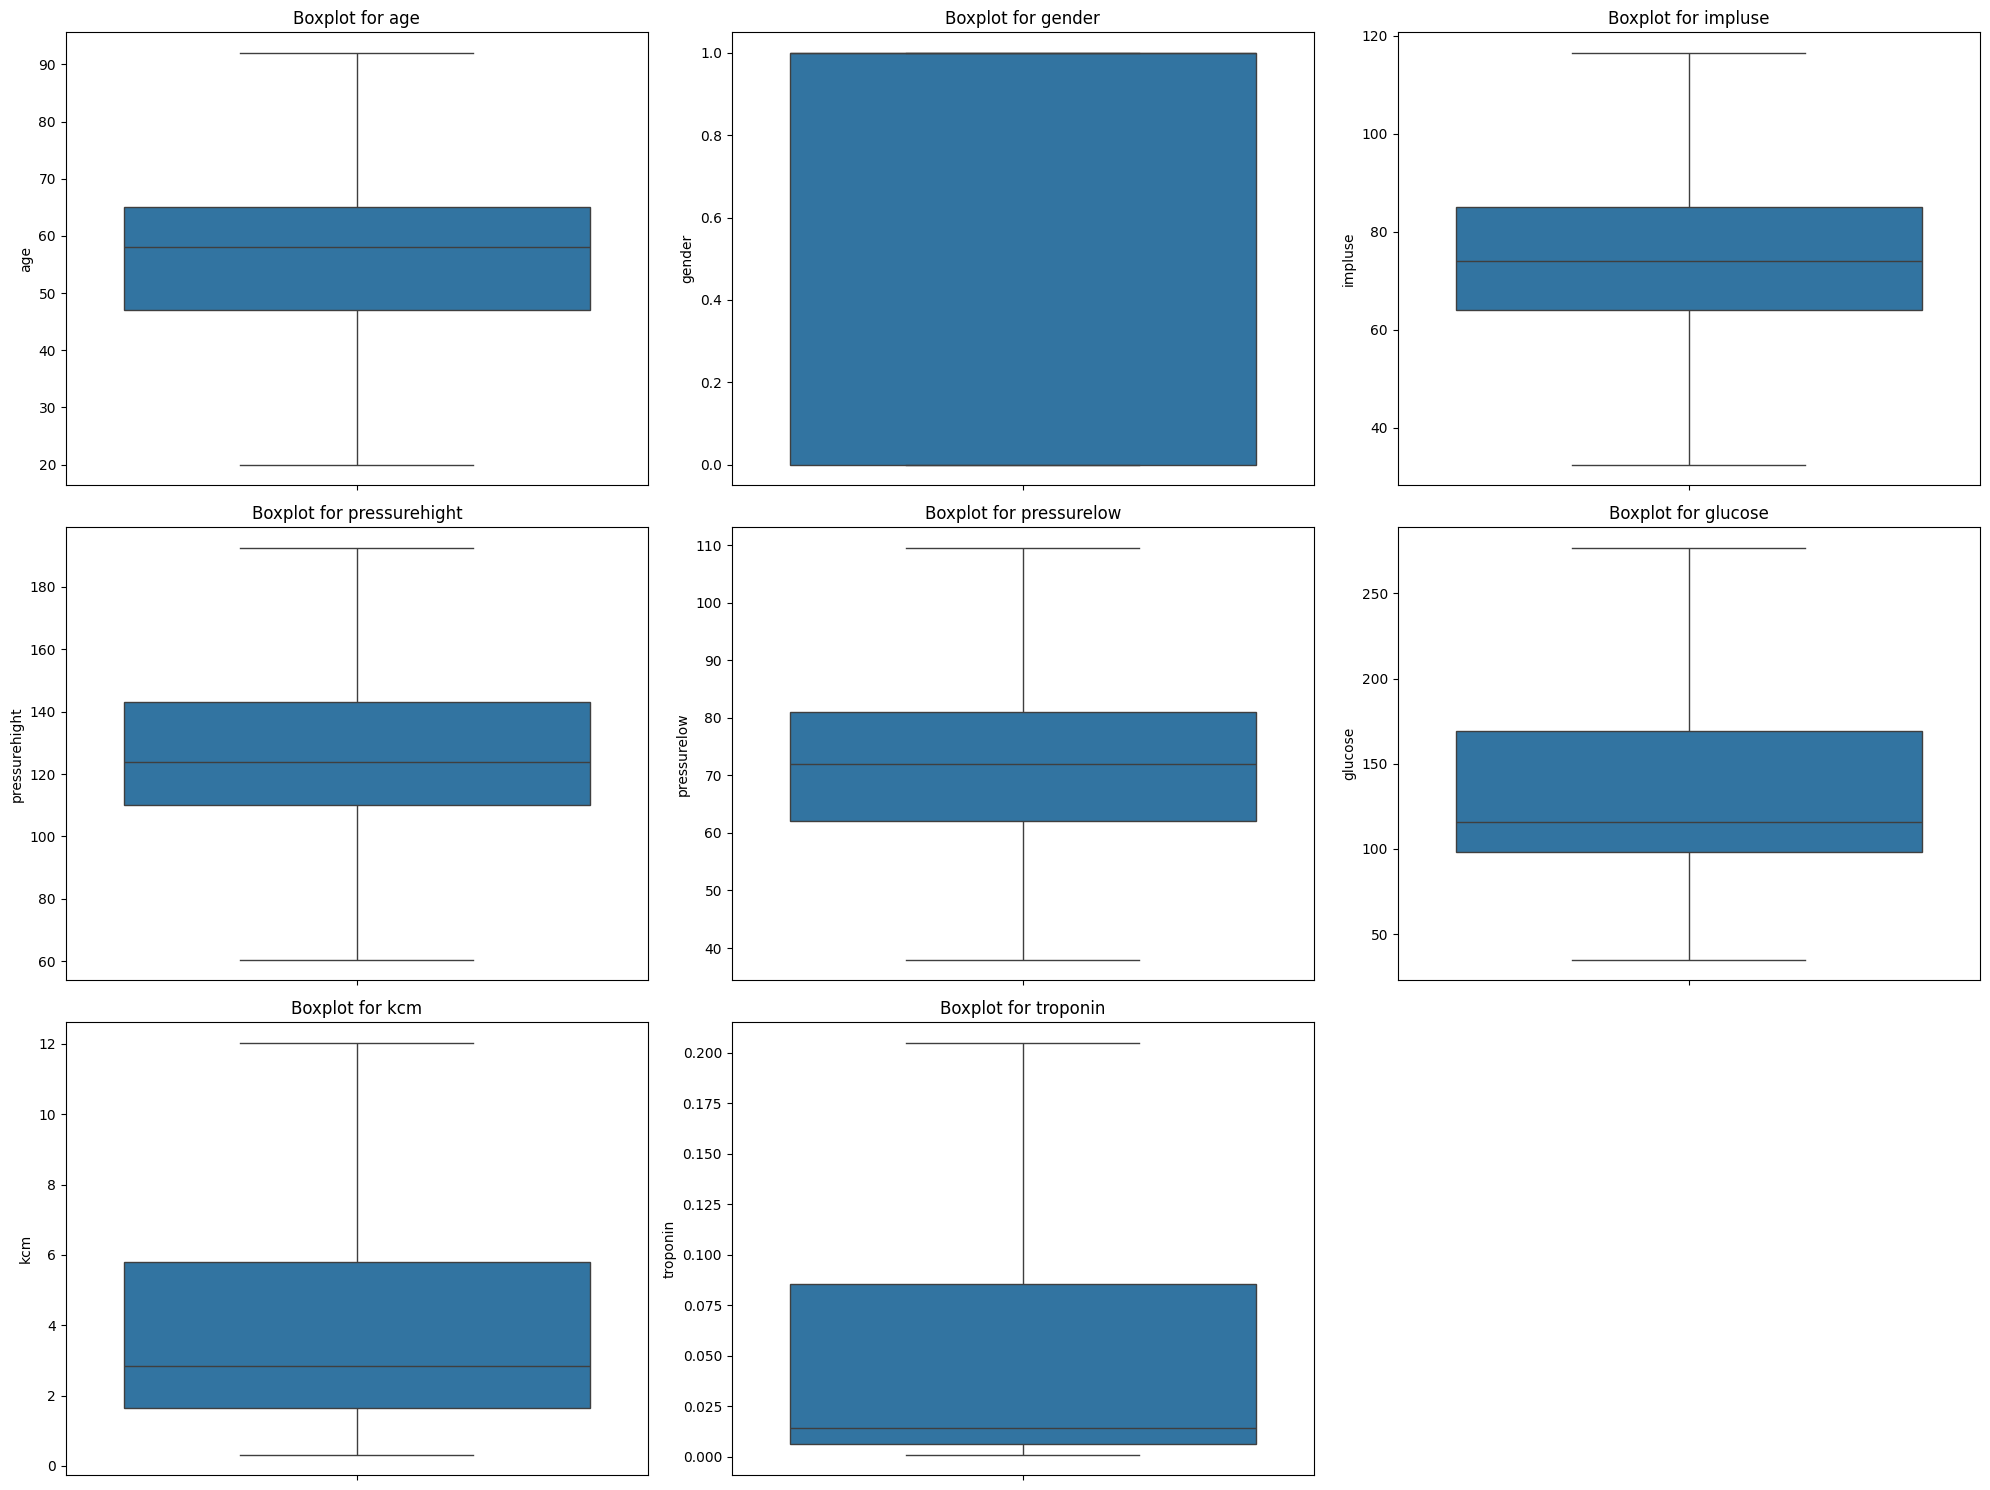

In [69]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(X[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
plt.show()

no outlier in out featurs

Correlation between all numerical columns

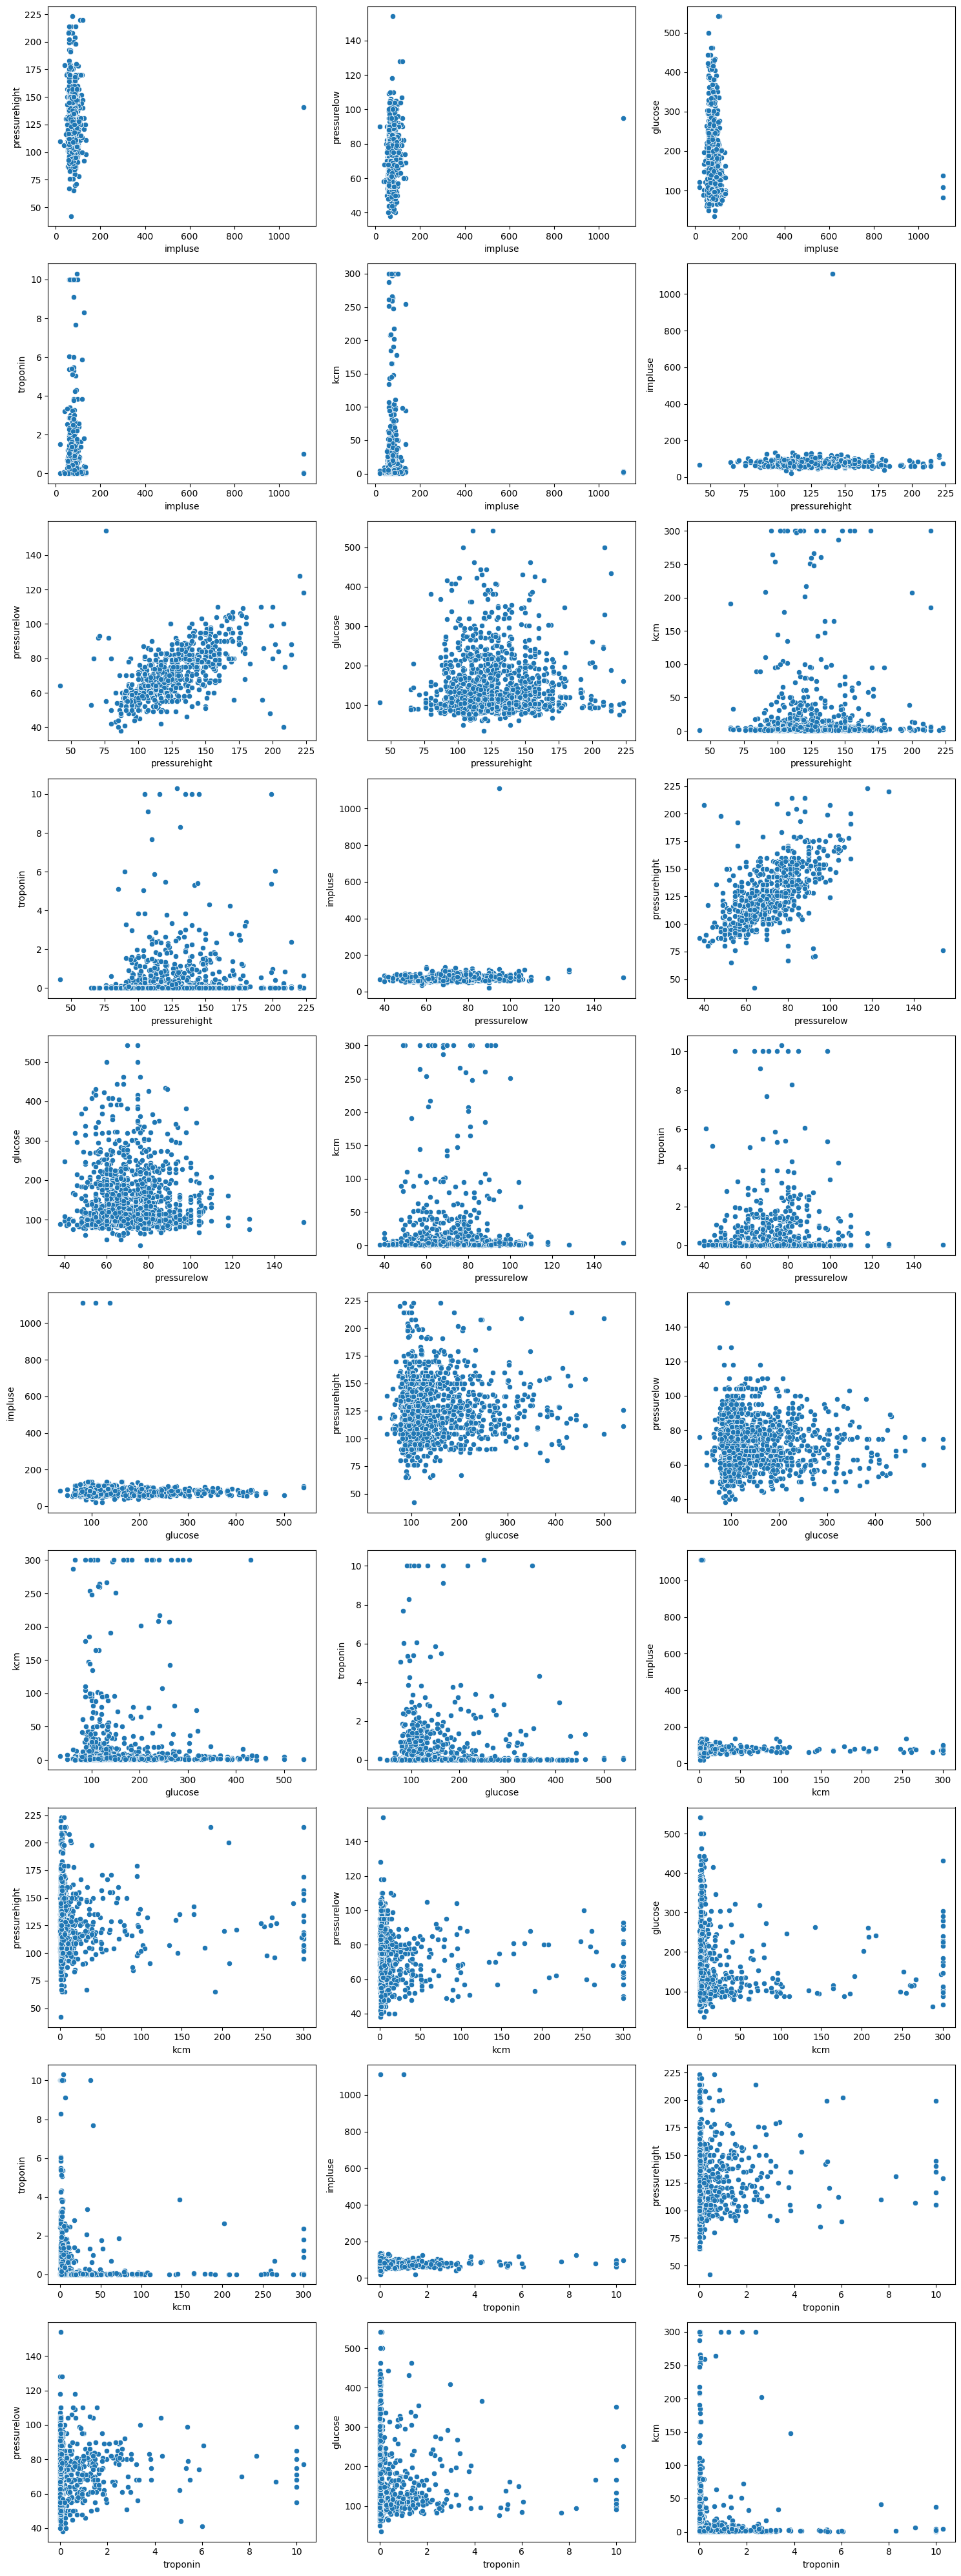

In [70]:
fig, axes = plt.subplots(10, 3, figsize=(15, 40))

sns.scatterplot(ax=axes[0, 0],x="impluse",y="pressurehight",data=df)
sns.scatterplot(ax=axes[0, 1],x="impluse",y="pressurelow",data=df)
sns.scatterplot(ax=axes[0, 2],x="impluse",y="glucose",data=df)

sns.scatterplot(ax=axes[1, 0],x="impluse",y="troponin",data=df)
sns.scatterplot(ax=axes[1, 1],x="impluse",y="kcm",data=df)
sns.scatterplot(ax=axes[1, 2],x="pressurehight",y="impluse",data=df)


sns.scatterplot(ax=axes[2, 0],x="pressurehight",y="pressurelow",data=df)
sns.scatterplot(ax=axes[2, 1],x="pressurehight",y="glucose",data=df)
sns.scatterplot(ax=axes[2, 2],x="pressurehight",y="kcm",data=df)

sns.scatterplot(ax=axes[3, 0],x="pressurehight",y="troponin",data=df)
sns.scatterplot(ax=axes[3, 1],x="pressurelow",y="impluse",data=df)
sns.scatterplot(ax=axes[3, 2],x="pressurelow",y="pressurehight",data=df)

sns.scatterplot(ax=axes[4, 0],x="pressurelow",y="glucose",data=df)
sns.scatterplot(ax=axes[4, 1],x="pressurelow",y="kcm",data=df)
sns.scatterplot(ax=axes[4, 2],x="pressurelow",y="troponin",data=df)

sns.scatterplot(ax=axes[5, 0],x="glucose",y="impluse",data=df)
sns.scatterplot(ax=axes[5, 1],x="glucose",y="pressurehight",data=df)
sns.scatterplot(ax=axes[5, 2],x="glucose",y="pressurelow",data=df)


sns.scatterplot(ax=axes[6, 0],x="glucose",y="kcm",data=df)
sns.scatterplot(ax=axes[6, 1],x="glucose",y="troponin",data=df)
sns.scatterplot(ax=axes[6, 2],x="kcm",y="impluse",data=df)


sns.scatterplot(ax=axes[7, 0],x="kcm",y="pressurehight",data=df)
sns.scatterplot(ax=axes[7, 1],x="kcm",y="pressurelow",data=df)
sns.scatterplot(ax=axes[7, 2],x="kcm",y="glucose",data=df)


sns.scatterplot(ax=axes[8, 0],x="kcm",y="troponin",data=df)
sns.scatterplot(ax=axes[8, 1],x="troponin",y="impluse",data=df)
sns.scatterplot(ax=axes[8, 2],x="troponin",y="pressurehight",data=df)

sns.scatterplot(ax=axes[9, 0],x="troponin",y="pressurelow",data=df)
sns.scatterplot(ax=axes[9, 1],x="troponin",y="glucose",data=df)
sns.scatterplot(ax=axes[9, 2],x="troponin",y="kcm",data=df)




plt.tight_layout()
plt.show()

In [71]:
# perform scaling for features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [72]:
X = pd.DataFrame(X, columns=['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'])

In [73]:
X.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.611111,1.0,0.398810,0.753788,0.629371,0.517063,0.126313,0.053988
1,0.013889,1.0,0.732143,0.284091,0.111888,1.000000,0.549065,1.000000
2,0.486111,1.0,0.375000,0.753788,0.545455,0.972079,0.142540,0.009816
3,0.611111,1.0,0.446429,0.450758,0.237762,0.972079,1.000000,0.593865
4,0.486111,1.0,0.375000,0.390152,0.377622,1.000000,0.064822,0.009816


In [74]:
y.head()

,class
0,negative
1,positive
2,negative
3,positive
4,negative


In [75]:
y.unique()

array(['negative', 'positive'], dtype=object)

In [76]:
# convert target class variable into numerical
y = y.map({'positive': 1, 'negative': 0})

In [77]:
# check for missing value in target
y.isnull().sum()

np.int64(0)

In [78]:
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [79]:
# spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train.shape

(1055, 8)

In [81]:
y_train.shape

(1055,)

In [82]:
# checking if data is balanced or not
y.value_counts()

,count
class,
1,810
0,509


data is extremely balanced

In [83]:
# build our model using Decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [84]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

In [85]:
# Define Hyperparameters for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],     # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for best split
}

In [86]:
# perform grid search
# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [87]:
# train model in best params
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [88]:
# Evaluate model
# Predictions
y_pred = best_dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9772727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



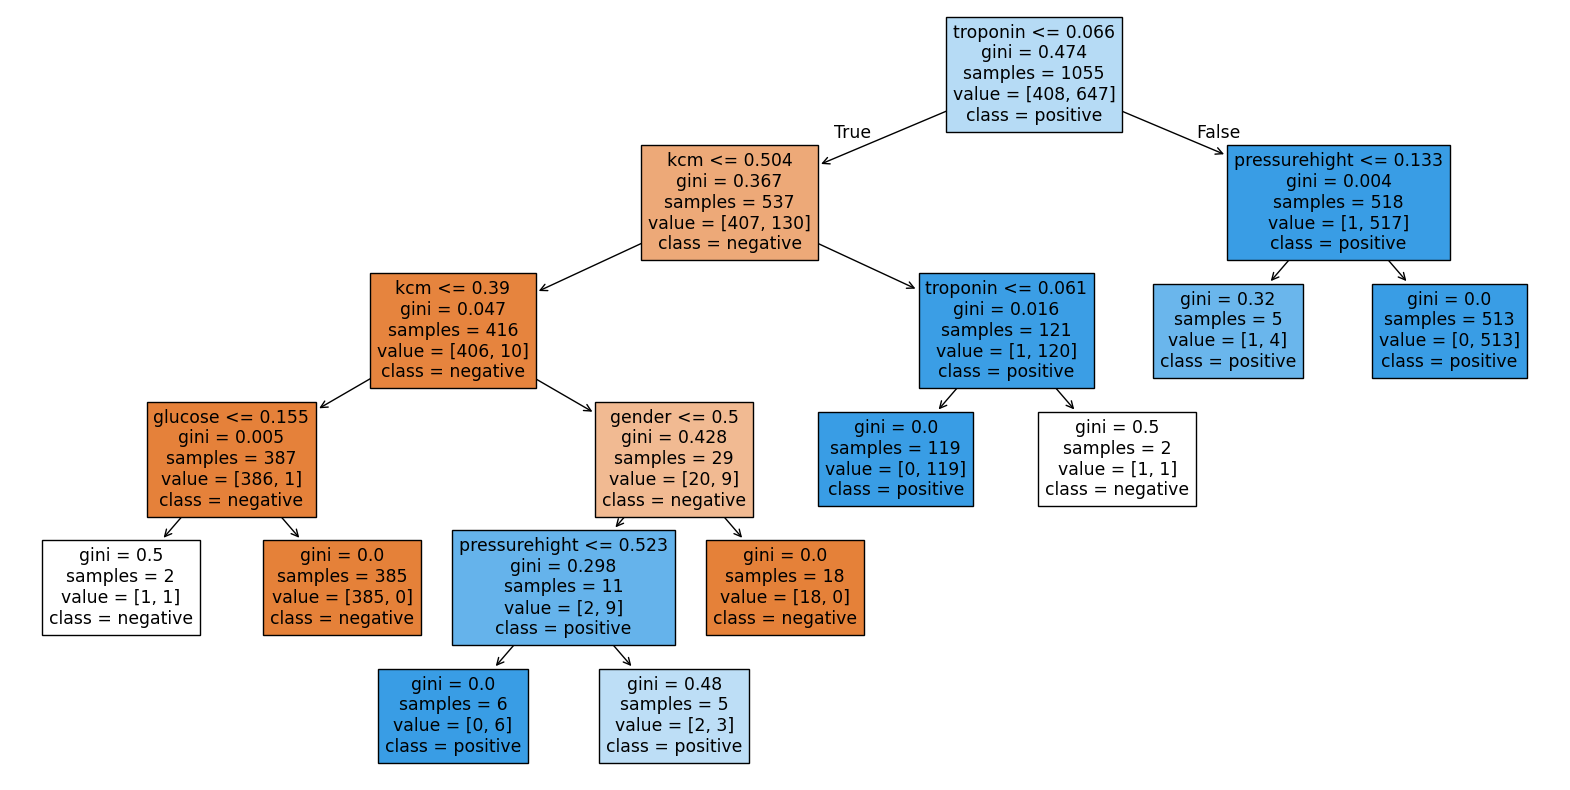

In [89]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['negative', 'positive'], filled=True)
plt.show()